# Explore here

## Step 1: Problem statement and data collection

Problem statement: classify houses according to their region and median income.

In [19]:
# Your code here

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

In [21]:
# Import dataset to start working with it
import pandas as pd

raw_data = pd.read_csv("../data/raw/housing.csv", sep=",")
raw_data.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


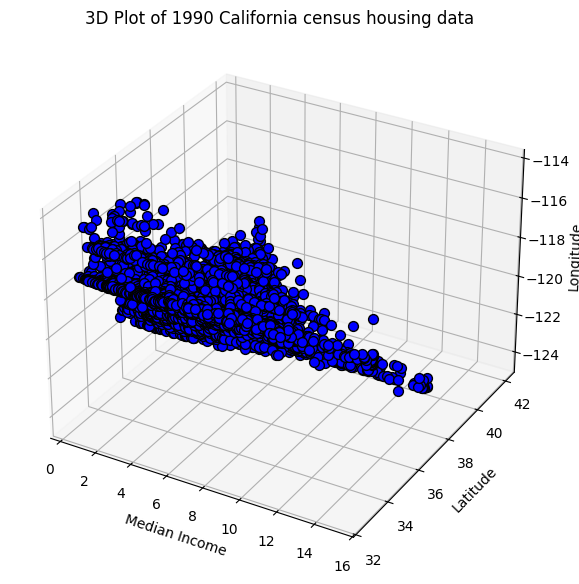

In [22]:
# Set up the 3D figure
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection="3d")

# Plot the data points
ax.scatter(
    raw_data["MedInc"],
    raw_data["Latitude"],
    raw_data["Longitude"],
    marker="o",
    edgecolor="k",
    s=50,
    c="b",
    depthshade=False,
)

# Set plot titles and labels
ax.set_title("3D Plot of 1990 California census housing data")
ax.set_xlabel("Median Income")
ax.set_ylabel("Latitude")
ax.set_zlabel("Longitude")

# Show the plot
plt.show()


In [23]:
# alternate means of plotting same, using package learned about during last week's assignment:
import plotly.express as px

# --- 3‑D scatter using Plotly Express ---------------------------------
fig = px.scatter_3d(
    raw_data,
    x="MedInc",  
    y="Latitude", 
    z="Longitude",
    ## keep the single‑color aesthetic of the matplotlib version
    color_discrete_sequence=["#1f77b4"],  # Plotly’s default blue
    size_max=8,  # caps marker scaling if `size=` is ever used
    width=1000,
    height=700,
)

# Set title and axis labels
fig.update_layout(
    title="3D Plot of 1990 California census housing data",
    scene=dict(
        xaxis_title="Median Income",
        yaxis_title="Latitude",
        zaxis_title="Longitude",
    ),
)

# Optional: define a starting camera angle (similar to your second snippet)
camera = dict(up=dict(x=0, y=0, z=1), eye=dict(x=1.75, y=1.75, z=0.6))
fig.update_layout(scene_camera=camera)

fig.show()

In [24]:
# Apply K-Means clustering with 6 clusters
kmeans_model = KMeans(n_clusters=6, random_state=42)
raw_data["Cluster"] = kmeans_model.fit_predict(raw_data)

# Display the resulting DataFrame with the assigned clusters
print(raw_data)


       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  MedHouseVal  Cluster 

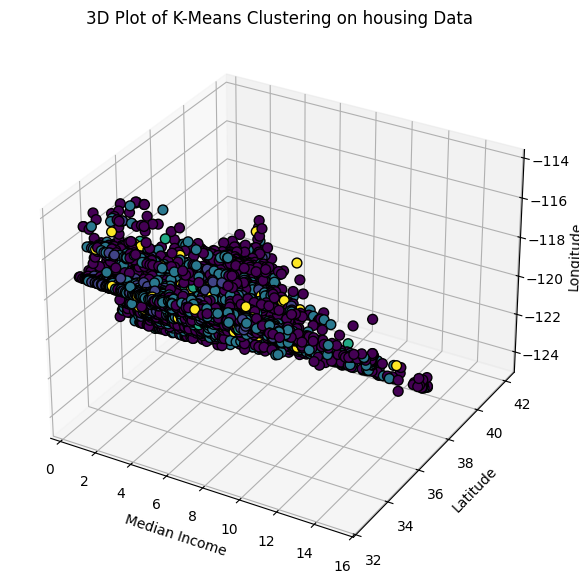

In [25]:
# Create a 3D plot for the clustered data points
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection="3d")

# Plot the data points using the cluster labels for coloring
ax.scatter(
    raw_data["MedInc"],
    raw_data["Latitude"],
    raw_data["Longitude"],
    c=raw_data["Cluster"],
    cmap="viridis",
    marker="o",
    edgecolor="k",
    s=50,
    depthshade=False,
)

# Set plot titles and labels
ax.set_title("3D Plot of K-Means Clustering on housing Data")
ax.set_xlabel("Median Income")
ax.set_ylabel("Latitude")
ax.set_zlabel("Longitude")

# Show the plot
plt.show()


In [27]:
import plotly.express as px

# --- 3‑D scatter of customer clusters --------------------------------
fig = px.scatter_3d(
    raw_data,
    x="MedInc",
    y="Latitude", 
    z="Longitude",  
    color="Cluster",  # cluster IDs color‑code the points
    color_continuous_scale=px.colors.sequential.Viridis,  # mirrors matplotlib’s “viridis”
    width=1000,
    height=700,
    opacity=0.85,  # softens dense areas; tweak to taste
)

# Titles and axis labels
fig.update_layout(
    title="3D Plot of K‑Means Clustering on housing Data",
    scene=dict(
        xaxis_title="Median Income",
        yaxis_title="Latitude",
        zaxis_title="Longitude",
    ),
)

# Optional: set an initial camera angle
camera = dict(up=dict(x=0, y=0, z=1), eye=dict(x=1.6, y=1.6, z=0.5))
fig.update_layout(scene_camera=camera)

fig.show()


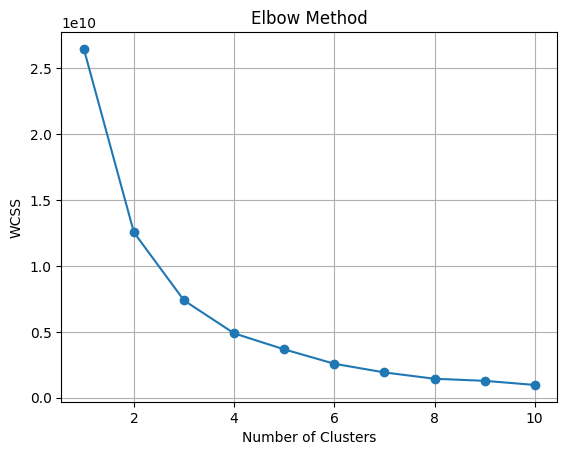

In [ ]:
# Create a list to store the WCSS values for different numbers of clusters
wcss = []

# Calculate WCSS for cluster numbers ranging from 1 to 10
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(raw_data)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.plot(range(1, 11), wcss, marker="o")
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.grid(True)
plt.show()
